In [6]:
import numpy as np
import pandas as pd

### Ucitavanje ulaznih podataka

In [7]:
# ucitavanje ulaznih podataka
data_pr149 = pd.read_csv('1.csv')
data_pr149.head()

,QuestionId,Time,FpogX,FpogY,Valid
0,0,6983.47607,0.39438,0.17405,1
1,0,6983.49316,0.39450,0.17494,1
2,0,6983.50977,0.39537,0.17542,1
3,0,6983.52539,0.39558,0.17523,1
4,0,6983.54150,0.39577,0.17505,1


In [8]:
data_pr149.describe()

,QuestionId,Time,FpogX,FpogY,Valid
count,10598.000000,10598.000000,10598.000000,10598.000000,10598.000000
mean,9.895452,7070.523668,0.496771,0.408375,0.768447
std,6.390638,50.264644,0.226897,0.279286,0.421845
min,0.000000,6983.476070,0.000000,-1.157370,0.000000
25%,4.000000,7026.999148,0.255283,0.131130,1.000000
50%,10.000000,7070.522950,0.519510,0.391915,1.000000
75%,16.000000,7114.048098,0.717328,0.689148,1.000000
max,20.000000,7157.572270,0.968850,0.950030,1.000000


### Pretprocesiranje ulaznih podataka

In [9]:
import math
filt = data_pr149[data_pr149['QuestionId'] == 1]
filt = filt[filt['Valid'] ==1]
time = filt['Time']
display(len(time))
fpog_x = filt['FpogX']*1920
fpog_y = filt['FpogY']*1080
len(filt)

607

607

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X = np.array((fpog_x,fpog_y,time)).T
scaler = MinMaxScaler()
print(scaler.fit(X))
X = scaler.transform(X)
X

MinMaxScaler(copy=True, feature_range=(0, 1))


array([[0.52093082, 0.48715954, 0.        ],
       [0.51900566, 0.48367099, 0.00130218],
       [0.5186403 , 0.47979352, 0.00268357],
       ...,
       [0.77803072, 0.76037431, 0.99735604],
       [0.77808693, 0.75936075, 0.99865822],
       [0.77836797, 0.75786397, 1.        ]])

0.006653885358790355

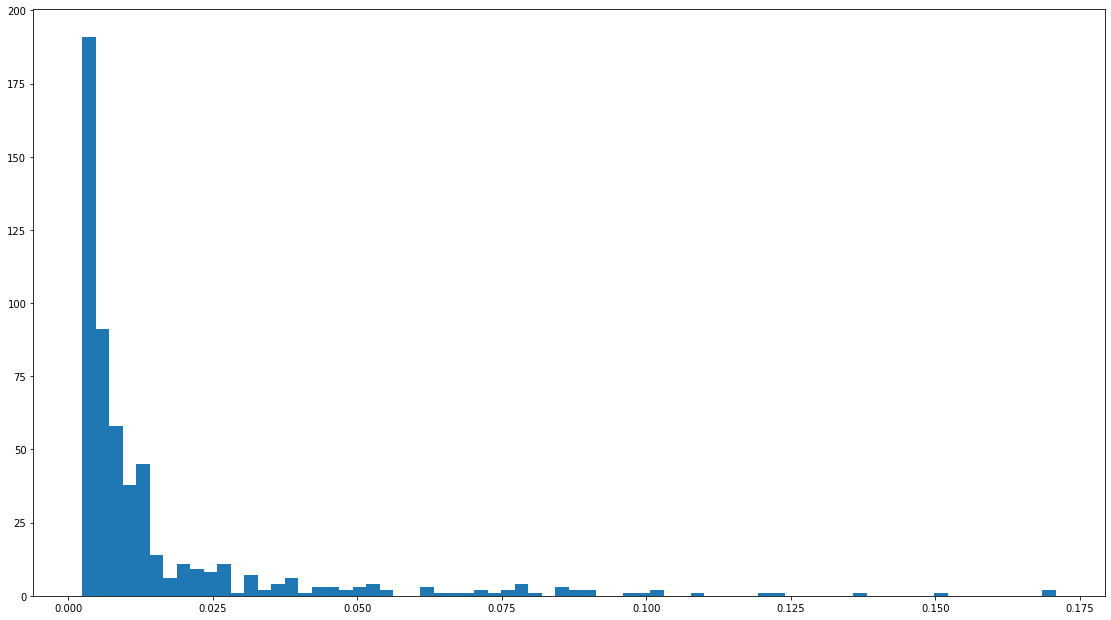

In [249]:
from sklearn.neighbors import KDTree
import statistics as stat
tree = KDTree(X)
nearest_dist, nearest_ind = tree.query(X,k=5)

knn = []
for i in nearest_dist:
    knn.append(i[3])
    
plt.figure(figsize=(19.20,10.80))
#plt.bar(np.arange(len(knn)), knn)
plt.hist(knn, bins='auto');

stat.median(knn)

## Izdvajanje samo jedne tacke iz mikro sekvence

In [5]:
one_x = []
one_y = []

flag = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for (x,y) in zip(fpog_x,fpog_y):
    if x > 625.4 and x < 1289.5 and y > 111.78 and y < 175.44:
        if flag[0] != 1:
            one_x.append(x)
            one_y.append(y)
            display('NASLOV')
        flag = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    elif x > 223.0 and x < 708.0 and y > 209.9 and y < 482.0:
        if flag[1] != 1:
            one_x.append(x)
            one_y.append(y)
            display('SLIKA 1')
        flag = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
       
    elif x > 223.0 and x < 708.0 and y > 497.9 and y < 585.0:
        if flag[2] != 1:
            one_x.append(x)
            one_y.append(y)
            display('ODGOVOR 1')
        flag = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
        
    elif x > 1234.0 and x < 1719.0 and y > 209.9 and y < 482.0:
        if flag[3] != 1:
            one_x.append(x)
            one_y.append(y)
            display('SLIKA 2')
        flag = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
        
    elif x > 1234.0 and x < 1719.0 and y > 297.9 and y < 585.0:
        if flag[4] != 1:
            one_x.append(x)
            one_y.append(y)
            display('ODGOVOR 2')
        flag = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
        
    elif x > 223.0 and x < 708.0 and y > 596.7 and y < 918.98:
        if flag[5] != 1:
            one_x.append(x)
            one_y.append(y)
            display('SLIKA 3')
        flag = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
        
    elif x > 223.0 and x < 708.0 and y > 925.0 and y < 1919.96:
        if flag[6] != 1:
            one_x.append(x)
            one_y.append(y)
            display('ODGOVOR 3')
        flag = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
        
    elif x > 1234.0 and x < 1719.0 and y > 596.7 and y < 919.13:
        if flag[7] != 1:
            one_x.append(x)
            one_y.append(y)
            display('SLIKA 4')
        flag = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
        
    elif x > 1234.0 and x < 1719.0 and y > 925.0 and y < 1010.93:
        if flag[8] != 1:
            one_x.append(x)
            one_y.append(y)
            display('ODGOVOR 4')
        flag = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
        
    else:
        if flag[9] != 1:
            one_x.append(x)
            one_y.append(y)
            #display('OKOLO')
        flag = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

'SLIKA 4'

'ODGOVOR 1'

'SLIKA 1'

'NASLOV'

'NASLOV'

'NASLOV'

'SLIKA 4'

'ODGOVOR 2'

'SLIKA 2'

'SLIKA 1'

'ODGOVOR 1'

'SLIKA 3'

'SLIKA 4'

'ODGOVOR 3'

'SLIKA 3'

'ODGOVOR 3'

'ODGOVOR 4'

'SLIKA 1'

'ODGOVOR 1'

'ODGOVOR 4'

'SLIKA 1'

'ODGOVOR 4'

'ODGOVOR 4'

'SLIKA 4'

'ODGOVOR 4'

'SLIKA 4'

'ODGOVOR 4'

'ODGOVOR 4'

'SLIKA 4'

'ODGOVOR 2'

### Racunanje sakadne duzine, sakadnog ugla i Pretvaranje iz radijana u stepene

In [122]:
diff_one_x = np.diff(one_x)
diff_one_y = np.diff(one_y)

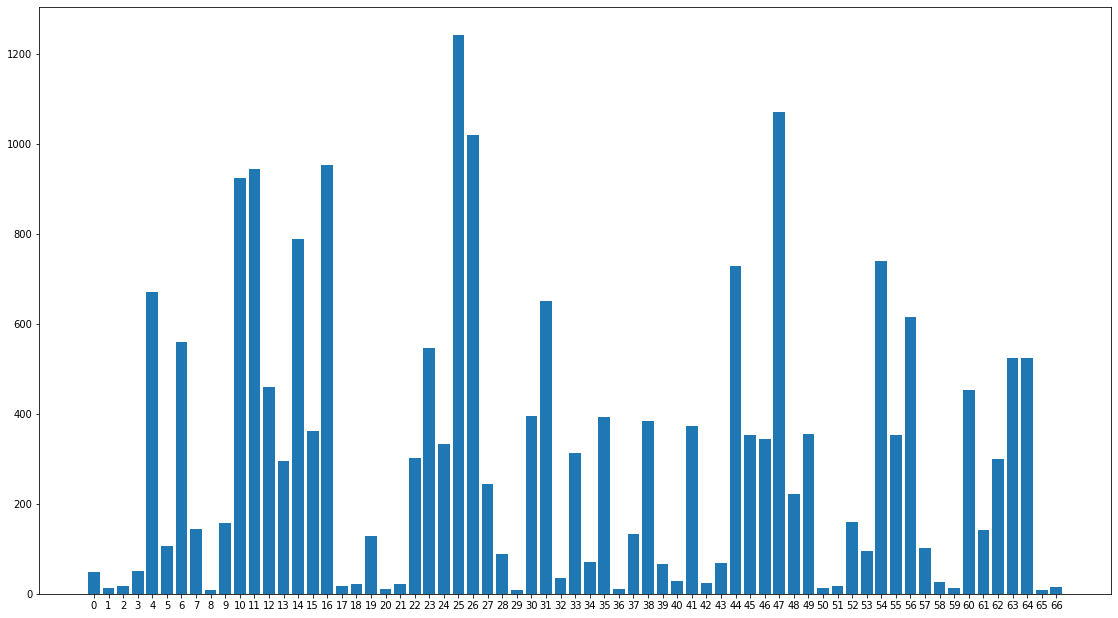

In [128]:
sakadna_duzina = np.sqrt(np.power(diff_x,2) + np.power(diff_y,2))
one_sakadna_duzina = np.sqrt(np.power(diff_one_x,2) + np.power(diff_one_y,2))
plt.figure(figsize=(19.20,10.80))
plt.bar(np.arange(len(one_sakadna_duzina)), one_sakadna_duzina)
plt.xticks(np.arange(len(one_sakadna_duzina)), np.arange(len(one_sakadna_duzina)));


In [129]:
one_sakadni_uglovi = np.arctan2(diff_one_x,diff_one_y)
sakadni_uglovi = np.arctan2(diff_x,diff_y)
degs = []
one_degs = []
for i in one_sakadni_uglovi:
    one_degs.append(math.degrees(i))
                
for i in sakadni_uglovi:
    degs.append(math.degrees(i))

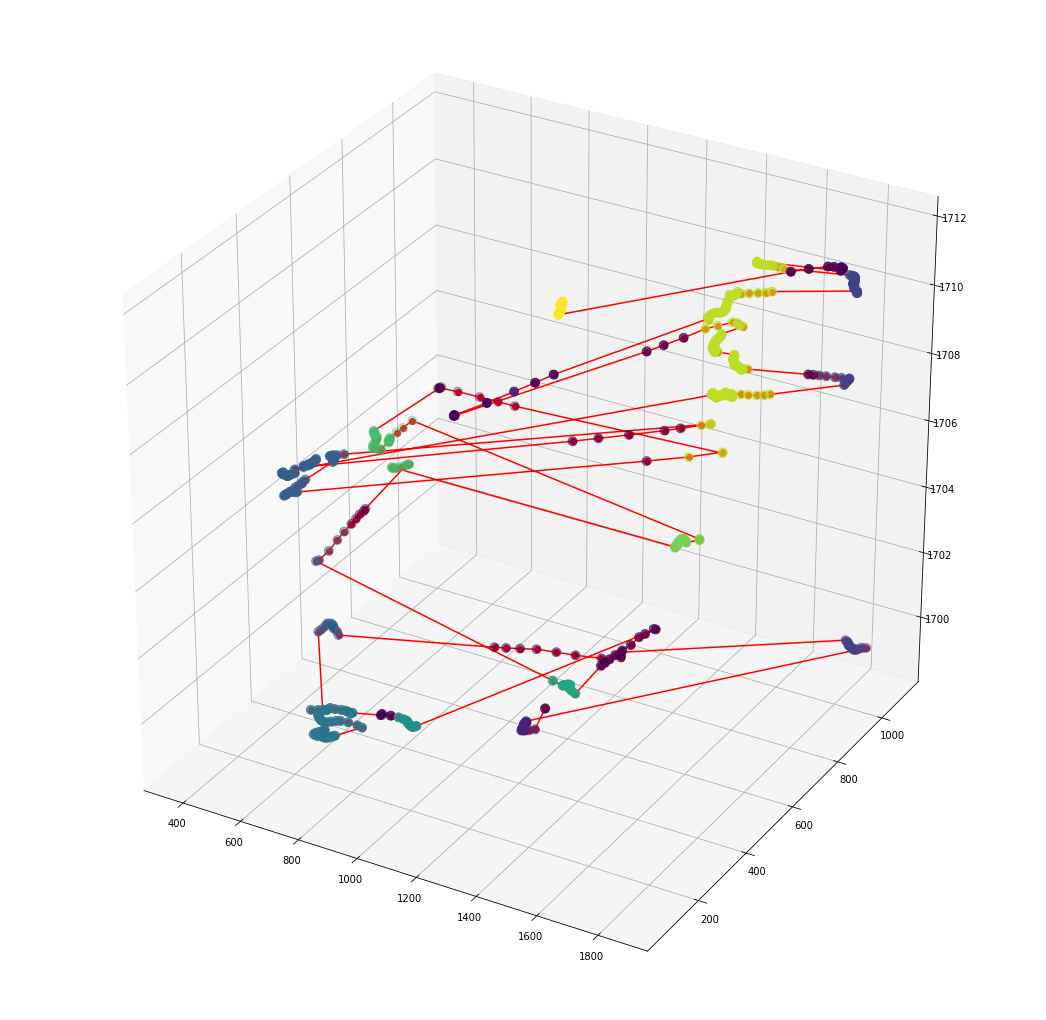

In [202]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(18.5, 18.5)
ax = fig.add_subplot(111, projection='3d')
ax.plot(fpog_x, fpog_y, time,  c='r', marker='o')
ax.scatter(fpog_x, fpog_y, time,s=80,  c=clustering.labels_)
diff_x = np.diff(fpog_x)  
diff_y = np.diff(fpog_y)

In [1]:
x = one_x
y = one_y

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots()
ax.plot(x,y, marker="o")
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
plt.show()

NameError: name 'one_x' is not defined

(1131.1543882718777, 56.791611728122525)

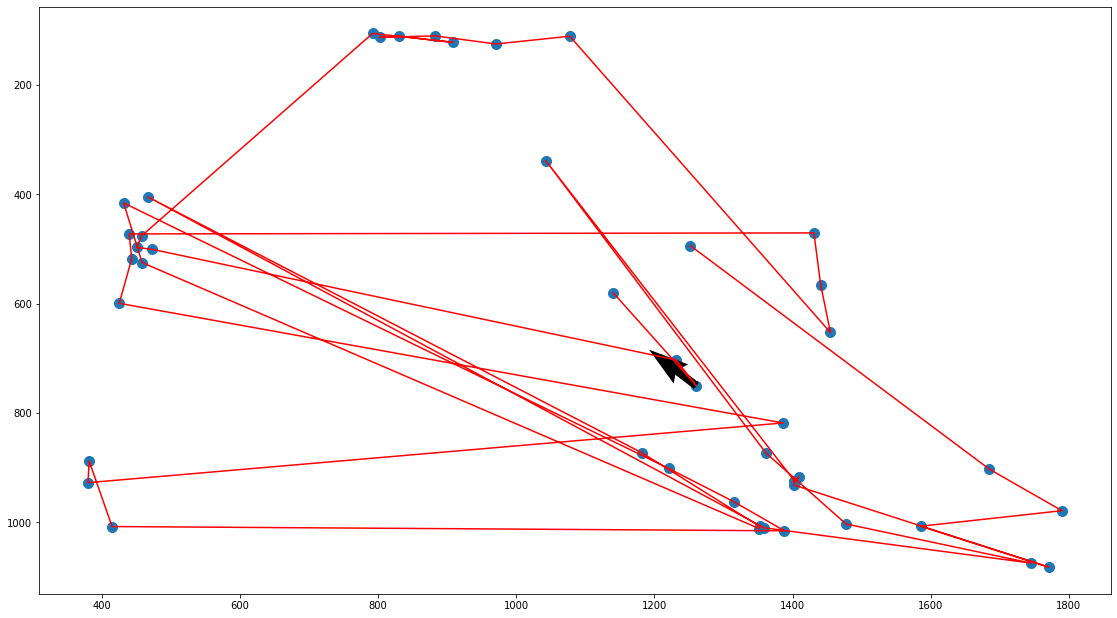

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19.20,10.80))
plt.scatter(,one_y,s=100)
plt.quiver(one_x[1],one_y[1],np.cos(one_x[1]),np.sin(one_y[1]))
plt.plot(one_x,one_y, c='r')

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
#ax.set_xlim(ax.get_xlim()[::-1])

In [130]:
v = []



for i in one_degs:
    if i < 135 and i >=45:
        v.append('GLEDA GORE')
    elif i< 45 and i >=-45:
        v.append('GLEDA LEVO')
    elif i>= -135 and i<-45:
        v.append('GLEDA DOLE')
    else:
        v.append('GLEDA DESNO')
        
v
rez = []

for i in range(0,len(v)-1):
    if v[i] != v[i+1]:
        rez.append(v[i])

rez

['GLEDA DESNO',
 'GLEDA DOLE',
 'GLEDA DESNO',
 'GLEDA GORE',
 'GLEDA DOLE',
 'GLEDA GORE',
 'GLEDA LEVO',
 'GLEDA DOLE',
 'GLEDA DESNO',
 'GLEDA GORE',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA GORE',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA DOLE',
 'GLEDA LEVO',
 'GLEDA GORE',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA DOLE',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA GORE',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA DOLE',
 'GLEDA GORE',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA LEVO',
 'GLEDA DESNO',
 'GLEDA GORE']

In [87]:

# racunanje vremenskog trajanja (frekvencija je 60Hz, tako da ova vrednost treba da bude priblizno 1/60)
time = data_pr149['Time']
timeDiff = np.diff(time)
timeDiff;

In [88]:
# dodavanje trajanja u dataframe, uz izbacivanje prvog reda podataka
data_pr149.drop(data_pr149.index[0], inplace=True)
data_pr149['Duration'] = timeDiff
data_pr149.head()

,QuestionId,Time,FpogX,FpogY,Valid,Duration
2,0,1687.97119,0.40352,0.41147,1,0.01452
3,0,1687.98755,0.40233,0.40806,1,0.01636
4,0,1688.00464,0.40130,0.40378,1,0.01709
5,0,1688.02039,0.38925,0.37478,0,0.01575
6,0,1688.03735,0.39426,0.34855,0,0.01696


In [89]:
# procecno trajanje (deluje dobro)
data_pr149['Duration'].mean()

0.016428909548153025

In [ ]:
# ukupno trajanje testa
data_pr149['Duration'].sum() / 60.0

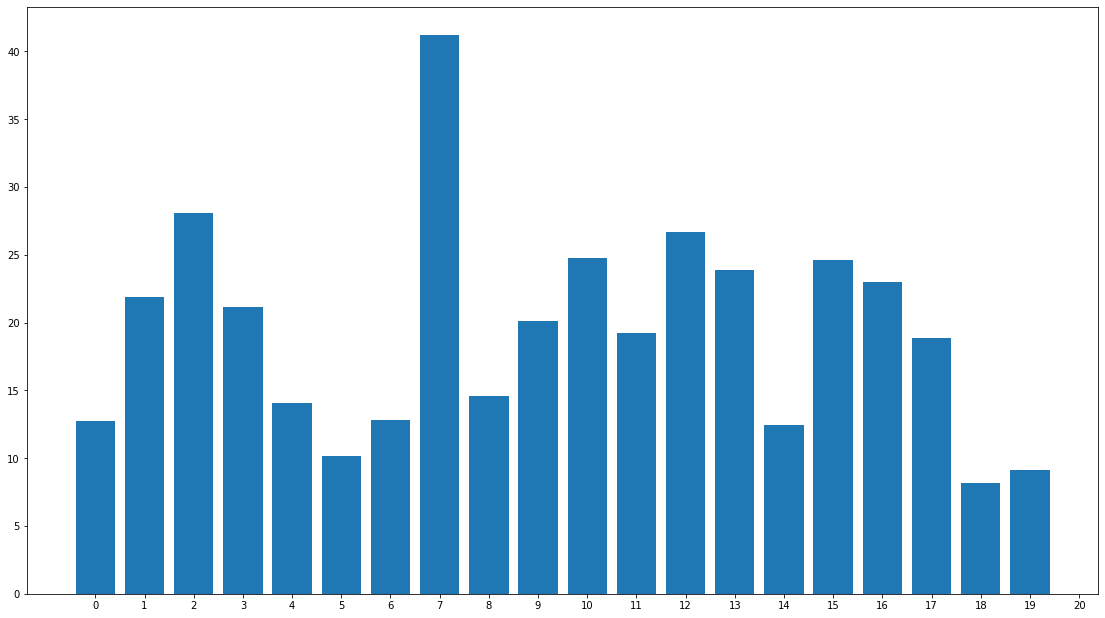

In [119]:
# trajanje po svakom od pitanja
trajanje_pitanja = data_pr149.groupby('QuestionId')['Duration'].sum()
plt.figure(figsize=(19.20,10.80))
plt.bar(np.arange(len(trajanje_pitanja)-1), trajanje_pitanja[1:len(trajanje_pitanja)])
plt.xticks(np.arange(len(data_pr149.groupby('QuestionId')))), np.arange(len(data_pr149.groupby('QuestionId')));

In [91]:
# broj validnih uzoraka
num = data_pr149['Valid'].count()
valid_num = data_pr149[data_pr149['Valid'] == 1]['Valid'].count()
invalid_num = data_pr149[data_pr149['Valid'] == 0]['Valid'].count()

print('Broj rezultata: ' + str(num))
print('Broj validnih rezultata: ' + str(valid_num))
print('Broj nevalidnih rezultata: ' + str(invalid_num))

Broj rezultata: 24256
Broj validnih rezultata: 17416
Broj nevalidnih rezultata: 6840
